In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from dataset.sentinel import *
from models.conv_ae_1D import *
import torch
import random
from torchvision.transforms import transforms as T, Lambda
from config import *
import sys
from notebook_utils import launch_train_advice
sys.path.append('../esa')
from esa.load_utils import *
from esa.conv_utils import *

import numpy as np
from omegaconf import OmegaConf
%matplotlib inline

architecture = 'conv_ae1D'
os.environ['architecture'] = architecture
config_file = os.path.join(conf_path, architecture+'.yaml')
cfg = OmegaConf.load(config_file)
cfg.dataset.out_window = cfg.dataset.sequence_length

In [3]:
if os.path.exists(model_results+ '{}/'.format(architecture)):
    model_list = os.listdir(model_results+ '{}/'.format(architecture))
    for ix, mn in enumerate(model_list):  
        print('model num {}: {}'.format(ix,model_list[ix]))
else:
    os.makedirs(model_results+ '{}/'.format(architecture))
    model_list = []

model num 0: conv_ae1D_sl_16_filter_n_110_kernel_size_7_24_03_2023_11:25:43.pth
model num 1: .ipynb_checkpoints
model num 2: conv_ae1D_sl_16_filter_n_110_kernel_size_7_02_04_2023_14:57:11.pth
model num 3: conv_ae1D_sl_16_filter_n_110_kernel_size_7_02_04_2023_15:04:25.pth
model num 4: conv_ae1D_sl_16_filter_n_110_kernel_size_7_02_04_2023_16:40:09.pth
model num 5: conv_ae1D_sl_16_filter_n_110_kernel_size_7_02_04_2023_16:58:10.pth
model num 6: conv_ae1D_sl_16_filter_n_110_kernel_size_7_03_04_2023_09:22:23.pth
model num 7: conv_ae1D_sl_16_filter_n_110_kernel_size_7_03_04_2023_09:32:52.pth


In [4]:
launch_train_advice(cfg, model_list, config_file)

to train a model  switch train_model to True  in the next cell
to train a new model from scratch set train_model to True in the next cell

check the configuration file in /srv/penny/FIORIRE/time_series_anomaly_detection/configuration/conv_ae1D.yaml to set the hyperparameters of the model

actual dataset configuration is {'name': 'all_2016-2018_clean_std_4s.pkl', 'sequence_length': 16, 'columns': ['RW1_motcurr', 'RW2_motcurr', 'RW3_motcurr', 'RW4_motcurr', 'RW1_cmd_volt', 'RW2_cmd_volt', 'RW3_cmd_volt', 'RW4_cmd_volt', 'RW1_therm', 'RW2_therm', 'RW3_therm', 'RW4_therm', 'RW1_speed', 'RW2_speed', 'RW3_speed', 'RW4_speed'], 'train_val_split': 0.7, 'shuffle': 0, 'columns_subset': 0, 'dataset_subset': 1000000, 'batch_size': 1000, 'sampling_rate': '4s', 'scaled': 1, 'target': None, 'forecast': 0, 'forecast_all': 0, 'predict': 0, 'out_window': 16}

actual architecture configuration is {'architecture': 'conv_ae1D', 'increasing': 0, 'flattened': 0, 'latent_dim': 100, 'stride': 1, 'pool': 1, 'ke

In [5]:
train_model = True

now = 2023-04-04 19:03:03.875347


/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))
/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


{'name': 'all_2016-2018_clean_std_4s.pkl', 'sequence_length': 16, 'columns': ['RW1_motcurr', 'RW2_motcurr', 'RW3_motcurr', 'RW4_motcurr', 'RW1_cmd_volt', 'RW2_cmd_volt', 'RW3_cmd_volt', 'RW4_cmd_volt', 'RW1_therm', 'RW2_therm', 'RW3_therm', 'RW4_therm', 'RW1_speed', 'RW2_speed', 'RW3_speed', 'RW4_speed'], 'train_val_split': 0.7, 'shuffle': 0, 'columns_subset': 0, 'dataset_subset': 1000000, 'batch_size': 1000, 'sampling_rate': '4s', 'scaled': 1, 'target': ['RW1_motcurr', 'RW2_motcurr', 'RW3_motcurr', 'RW4_motcurr', 'RW1_cmd_volt', 'RW2_cmd_volt', 'RW3_cmd_volt', 'RW4_cmd_volt', 'RW1_therm', 'RW2_therm', 'RW3_therm', 'RW4_therm', 'RW1_speed', 'RW2_speed', 'RW3_speed', 'RW4_speed'], 'forecast': 0, 'forecast_all': 0, 'predict': 0, 'out_window': 16, 'data_path': '/srv/penny/FIORIRE/time_series_anomaly_detection/data/FIORIRE/dataset_4s', 'n_features': 16, 'epochs': 200, 'lr': 0.0009, 'lr_patience': 5, 'es_patience': 10, 'architecture': 'conv_ae1D', 'increasing': 0, 'flattened': 0, 'latent_di

  0%|                                                | 0/200 [00:00<?, ?epoch/s]

epoch 0



  0%|                                        | 2/700 [00:00<04:15,  2.73batch/s]

Loss:
1.1381279230117798



  2%|▋                                      | 12/700 [00:02<01:29,  7.65batch/s]

Loss:
0.6329006552696228



  3%|█▏                                     | 22/700 [00:03<01:37,  6.98batch/s]

Loss:
0.546832263469696



  5%|█▊                                     | 32/700 [00:05<01:44,  6.36batch/s]

Loss:
0.4943990707397461



  6%|██▎                                    | 42/700 [00:06<01:39,  6.62batch/s]

Loss:
0.42585381865501404



  7%|██▉                                    | 52/700 [00:08<01:39,  6.54batch/s]

Loss:
0.3716527223587036



  9%|███▍                                   | 62/700 [00:09<01:32,  6.89batch/s]

Loss:
0.3346143960952759



 10%|████                                   | 72/700 [00:11<01:44,  6.02batch/s]

Loss:
0.3030688464641571



 12%|████▌                                  | 82/700 [00:12<01:32,  6.70batch/s]

Loss:
0.2423340380191803



 13%|█████▏                                 | 92/700 [00:14<01:17,  7.84batch/s]

Loss:
0.20561061799526215



 15%|█████▌                                | 102/700 [00:15<01:35,  6.28batch/s]

Loss:
0.19391201436519623



 16%|██████                                | 112/700 [00:17<01:30,  6.50batch/s]

Loss:
0.1671653538942337



 17%|██████▌                               | 122/700 [00:18<01:29,  6.46batch/s]

Loss:
0.1472381353378296



 19%|███████▏                              | 132/700 [00:20<01:24,  6.75batch/s]

Loss:
0.13490526378154755



 20%|███████▋                              | 142/700 [00:21<01:22,  6.73batch/s]

Loss:
0.11003763228654861



 22%|████████▎                             | 152/700 [00:23<01:15,  7.27batch/s]

Loss:
0.10724044591188431



 23%|████████▊                             | 162/700 [00:24<01:23,  6.44batch/s]

Loss:
0.09329062700271606



 25%|█████████▎                            | 172/700 [00:26<01:11,  7.33batch/s]

Loss:
0.0835799127817154



 26%|█████████▉                            | 182/700 [00:27<01:20,  6.45batch/s]

Loss:
0.08156197518110275



 27%|██████████▍                           | 192/700 [00:29<01:17,  6.54batch/s]

Loss:
0.07396530359983444



 29%|██████████▉                           | 202/700 [00:30<01:21,  6.12batch/s]

Loss:
0.06845911592245102



 30%|███████████▌                          | 212/700 [00:32<01:17,  6.27batch/s]

Loss:
0.06497390568256378



 32%|████████████                          | 222/700 [00:33<01:13,  6.47batch/s]

Loss:
0.06110887974500656



 33%|████████████▌                         | 232/700 [00:35<01:11,  6.55batch/s]

Loss:
0.05659026280045509



 35%|█████████████▏                        | 242/700 [00:37<01:10,  6.52batch/s]

Loss:
0.05308164656162262



 36%|█████████████▋                        | 252/700 [00:38<01:12,  6.20batch/s]

Loss:
0.05139608308672905



 37%|██████████████▏                       | 262/700 [00:40<01:06,  6.55batch/s]

Loss:
0.05010773986577988



 39%|██████████████▊                       | 272/700 [00:41<01:03,  6.73batch/s]

Loss:
0.048432234674692154



 40%|███████████████▎                      | 282/700 [00:43<01:03,  6.62batch/s]

Loss:
0.04632117226719856



 42%|███████████████▊                      | 292/700 [00:44<01:02,  6.51batch/s]

Loss:
0.042232807725667953



 43%|████████████████▍                     | 302/700 [00:46<01:00,  6.54batch/s]

Loss:
0.04111437872052193



 45%|████████████████▉                     | 312/700 [00:47<00:57,  6.74batch/s]

Loss:
0.04161762073636055



 46%|█████████████████▍                    | 322/700 [00:49<00:58,  6.48batch/s]

Loss:
0.04013795405626297



 47%|██████████████████                    | 332/700 [00:50<00:56,  6.53batch/s]

Loss:
0.039931122213602066



 49%|██████████████████▌                   | 342/700 [00:52<00:55,  6.47batch/s]

Loss:
0.03685595840215683



 50%|███████████████████                   | 352/700 [00:53<00:52,  6.60batch/s]

Loss:
0.0359482578933239



 52%|███████████████████▋                  | 362/700 [00:55<00:53,  6.37batch/s]

Loss:
0.03504269942641258



 53%|████████████████████▏                 | 372/700 [00:57<00:48,  6.82batch/s]

Loss:
0.0339268334209919



 55%|████████████████████▋                 | 382/700 [00:58<00:49,  6.38batch/s]

Loss:
0.034528400748968124



 56%|█████████████████████▎                | 392/700 [01:00<00:47,  6.51batch/s]

Loss:
0.03407619521021843



 57%|█████████████████████▊                | 402/700 [01:01<00:47,  6.32batch/s]

Loss:
0.03318200632929802



 59%|██████████████████████▎               | 412/700 [01:03<00:44,  6.49batch/s]

Loss:
0.03439198434352875



 60%|██████████████████████▉               | 422/700 [01:04<00:43,  6.43batch/s]

Loss:
0.03271888196468353



 62%|███████████████████████▍              | 432/700 [01:06<00:41,  6.49batch/s]

Loss:
0.03091331571340561



 63%|███████████████████████▉              | 442/700 [01:07<00:35,  7.37batch/s]

Loss:
0.03136546164751053



 65%|████████████████████████▌             | 452/700 [01:09<00:32,  7.70batch/s]

Loss:
0.03076655976474285



 66%|█████████████████████████             | 462/700 [01:10<00:35,  6.70batch/s]

Loss:
0.029426736757159233



 67%|█████████████████████████▌            | 472/700 [01:12<00:35,  6.48batch/s]

Loss:
0.027903499081730843



 69%|██████████████████████████▏           | 482/700 [01:13<00:33,  6.52batch/s]

Loss:
0.027716578915715218



 70%|██████████████████████████▋           | 492/700 [01:15<00:31,  6.54batch/s]

Loss:
0.028478281572461128



 72%|███████████████████████████▎          | 502/700 [01:16<00:30,  6.47batch/s]

Loss:
0.026621747761964798



 73%|███████████████████████████▊          | 512/700 [01:18<00:28,  6.63batch/s]

Loss:
0.02749599702656269



 75%|████████████████████████████▎         | 522/700 [01:19<00:29,  6.12batch/s]

Loss:
0.02714374288916588



 76%|████████████████████████████▉         | 532/700 [01:21<00:26,  6.33batch/s]

Loss:
0.025952033698558807



 77%|█████████████████████████████▍        | 542/700 [01:22<00:23,  6.58batch/s]

Loss:
0.026027610525488853



 79%|█████████████████████████████▉        | 552/700 [01:24<00:22,  6.48batch/s]

Loss:
0.025696881115436554



 80%|██████████████████████████████▌       | 562/700 [01:26<00:21,  6.44batch/s]

Loss:
0.0239176694303751



 82%|███████████████████████████████       | 572/700 [01:27<00:19,  6.52batch/s]

Loss:
0.023850146681070328



 83%|███████████████████████████████▌      | 582/700 [01:29<00:18,  6.42batch/s]

Loss:
0.024347618222236633



 85%|████████████████████████████████▏     | 592/700 [01:30<00:16,  6.46batch/s]

Loss:
0.023561041802167892



 86%|████████████████████████████████▋     | 602/700 [01:32<00:14,  6.78batch/s]

Loss:
0.02426180988550186



 87%|█████████████████████████████████▏    | 612/700 [01:33<00:12,  6.86batch/s]

Loss:
0.022823704406619072



 89%|█████████████████████████████████▊    | 622/700 [01:35<00:10,  7.53batch/s]

Loss:
0.022172268480062485



 90%|██████████████████████████████████▎   | 632/700 [01:36<00:10,  6.66batch/s]

Loss:
0.023250730708241463



 92%|██████████████████████████████████▊   | 642/700 [01:38<00:08,  6.61batch/s]

Loss:
0.022429699078202248



 93%|███████████████████████████████████▍  | 652/700 [01:39<00:07,  6.45batch/s]

Loss:
0.022526631131768227



 95%|███████████████████████████████████▉  | 662/700 [01:41<00:05,  6.55batch/s]

Loss:
0.021623771637678146



 96%|████████████████████████████████████▍ | 672/700 [01:42<00:04,  6.56batch/s]

Loss:
0.022143254056572914



 97%|█████████████████████████████████████ | 682/700 [01:44<00:02,  6.37batch/s]

Loss:
0.020701905712485313



 99%|█████████████████████████████████████▌| 692/700 [01:45<00:01,  6.57batch/s]

Loss:
0.02108197845518589



100%|██████████████████████████████████████| 700/700 [01:47<00:00,  6.54batch/s]

train loss at the end of epoch is  0.09971372678609831




Evaluating: 100%|█████████████████████████████| 300/300 [00:20<00:00, 14.38it/s]


eval loss 0.033944283767292895


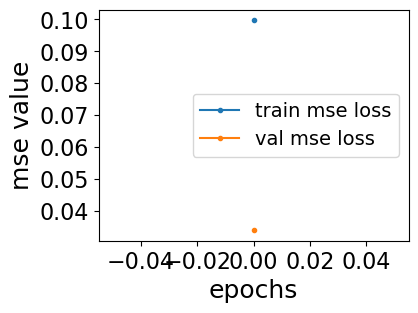

  0%|▏                                    | 1/200 [02:08<7:07:13, 128.81s/epoch]

val_loss improved from 10000000000000000 to 0.033944283767292895, saving model  conv_ae1D_sl_16_filter_n_110_kernel_size_7_04_04_2023_19:03:03 to /srv/penny/FIORIRE/time_series_anomaly_detection/model_results/conv_ae1D
epoch 1



  0%|                                        | 2/700 [00:00<04:11,  2.77batch/s]

Loss:
0.02095435932278633



  2%|▋                                      | 12/700 [00:02<01:48,  6.35batch/s]

Loss:
0.02094837836921215



  3%|█▏                                     | 22/700 [00:04<01:44,  6.46batch/s]

Loss:
0.019900770857930183



  5%|█▊                                     | 32/700 [00:05<01:44,  6.42batch/s]

Loss:
0.020298149436712265



  6%|██▎                                    | 42/700 [00:06<01:24,  7.77batch/s]

Loss:
0.02121734619140625



  7%|██▉                                    | 52/700 [00:08<01:27,  7.39batch/s]

Loss:
0.020755749195814133



  9%|███▍                                   | 62/700 [00:09<01:27,  7.31batch/s]

Loss:
0.020414084196090698



 10%|████                                   | 72/700 [00:11<01:20,  7.81batch/s]

Loss:
0.018974751234054565



 12%|████▌                                  | 82/700 [00:12<01:20,  7.71batch/s]

Loss:
0.02106798067688942



 13%|█████▏                                 | 92/700 [00:14<01:50,  5.48batch/s]

Loss:
0.01942283660173416



 15%|█████▌                                | 102/700 [00:15<01:40,  5.95batch/s]

Loss:
0.01864255778491497



 16%|██████                                | 112/700 [00:17<01:16,  7.70batch/s]

Loss:
0.019929278641939163



 17%|██████▌                               | 122/700 [00:18<01:19,  7.30batch/s]

Loss:
0.019247455522418022



 19%|███████▏                              | 132/700 [00:19<01:18,  7.20batch/s]

Loss:
0.019749553874135017



 20%|███████▋                              | 142/700 [00:21<01:29,  6.21batch/s]

Loss:
0.019160497933626175



 22%|████████▎                             | 152/700 [00:22<01:29,  6.15batch/s]

Loss:
0.0195330698043108



 23%|████████▊                             | 162/700 [00:24<01:13,  7.29batch/s]

Loss:
0.019776083528995514



 25%|█████████▎                            | 172/700 [00:25<01:25,  6.17batch/s]

Loss:
0.01842501200735569



 26%|█████████▉                            | 182/700 [00:27<01:19,  6.48batch/s]

Loss:
0.017982324585318565



 27%|██████████▍                           | 192/700 [00:28<01:24,  6.01batch/s]

Loss:
0.018583577126264572



 29%|██████████▉                           | 202/700 [00:30<01:17,  6.42batch/s]

Loss:
0.017506923526525497



 30%|███████████▌                          | 212/700 [00:32<01:19,  6.12batch/s]

Loss:
0.018900638446211815



 32%|████████████                          | 222/700 [00:33<01:16,  6.27batch/s]

Loss:
0.01793476566672325



 33%|████████████▌                         | 232/700 [00:35<01:02,  7.45batch/s]

Loss:
0.016972290351986885



 35%|█████████████▏                        | 242/700 [00:36<01:11,  6.37batch/s]

Loss:
0.0195432398468256



 36%|█████████████▋                        | 252/700 [00:38<01:00,  7.35batch/s]

Loss:
0.018541598692536354



 37%|██████████████▏                       | 262/700 [00:39<01:02,  6.97batch/s]

Loss:
0.017951849848031998



 39%|██████████████▊                       | 272/700 [00:41<00:57,  7.49batch/s]

Loss:
0.017037712037563324



 40%|███████████████▎                      | 282/700 [00:42<01:00,  6.89batch/s]

Loss:
0.017044389620423317



 42%|███████████████▊                      | 292/700 [00:43<00:54,  7.55batch/s]

Loss:
0.017063232138752937



 43%|████████████████▍                     | 302/700 [00:45<00:55,  7.22batch/s]

Loss:
0.01723245158791542



 45%|████████████████▉                     | 312/700 [00:46<00:50,  7.72batch/s]

Loss:
0.017353279516100883



 46%|█████████████████▍                    | 322/700 [00:47<00:50,  7.44batch/s]

Loss:
0.0167553573846817



  0%|▏                                    | 1/200 [02:58<9:51:44, 178.41s/epoch]


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [6]:
if train_model:
    %run ../main.py --config_name $architecture

In [7]:
model_list = os.listdir(model_results+ '{}/'.format(architecture))
if len(model_list) > 0:
    model_list = os.listdir(model_results+ '{}/'.format(architecture))
    for ix, mn in enumerate(model_list):  
        print('model num {}: {}'.format(ix,model_list[ix]))
    model_available = True
else:
    print('no model available')

model num 0: .ipynb_checkpoints
model num 1: conv_ae1D_sl_16_filter_n_110_kernel_size_7_04_04_2023_19:03:03.pth


In [8]:
selected_model = 1
if model_available:
    print(model_list[selected_model])
    model_name = model_list[selected_model].split('.')[0]
else:
    print('no model available')

conv_ae1D_sl_16_filter_n_110_kernel_size_7_04_04_2023_19:03:03.pth


In [9]:
try:
    sm = str(torch.cuda.get_device_capability())
    sm = ''.join((sm.strip('()').split(',')[0], sm.strip('()').split(',')[1])).replace(' ', '')
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda and sm in torch.cuda.get_arch_list() else "cpu")
except:
    device='cpu'

In [10]:
checkpoint  = torch.load(model_results+ '{}/'.format(architecture) + '/' + model_list[selected_model]
                         , map_location=device)
params_conf = checkpoint['param_conf']

In [11]:
#cols = params_conf['columns']
cols = params_conf['columns']
params_conf['n_features'] = len(cols)
sequence_length = params_conf['sequence_length']
batch_size = params_conf['batch_size']
predict = params_conf['predict']
use_cuda = torch.cuda.is_available()
out_window = params_conf['out_window']

n_features = params_conf['n_features']
scaled = params_conf['scaled']
sampling_rate = params_conf['sampling_rate']

columns_subset = params_conf['columns_subset']
dataset_subset = params_conf['dataset_subset']

data_path = params_conf['data_path']
dataset = params_conf['name']
train_val_split = params_conf['train_val_split']

target = params_conf['target']
batch_size = params_conf['batch_size']
sequence_length = params_conf['sequence_length']
out_window = params_conf['out_window']
predict = params_conf['predict']
activation = params_conf['activation']
kernel_size = params_conf['kernel_size']
filter_num = params_conf['filter_num']
latent_dim = params_conf['latent_dim']
n_layers = params_conf['n_layers']

dataset_name = os.path.join(data_path, "all_2016-2018_clean_std_4s.pkl")

In [12]:
if 'flattened' in params_conf.keys():
    flattened = flattened=params_conf['flattened']
else:
    flattened=False
if 'increasing' in params_conf.keys():
    increasing = flattened=params_conf['increasing']
else:
    increasing=False
    
model = CONV_AE1D(in_channel=params_conf['n_features'],  length=params_conf['sequence_length']
                  , kernel_size=params_conf['kernel_size'], filter_num=params_conf['filter_num'],
                  latent_dim = params_conf['latent_dim'],
                 n_layers=params_conf['n_layers'], activation = params_conf['activation']
                  , stride=params_conf['stride'], pool=params_conf['pool'],
                  flattened=flattened, increasing=increasing, bn = params_conf['bn']).to(device).float()

Initializing conv2d weights with Kaiming He normal
Initializing conv2d weights with Kaiming He normal
CONV_AE1D(
  (act): ELU(alpha=1.0)
  (encoder): Encoder(
    (nn_enc): Sequential(
      (enc_lay_0): Sequential(
        (0): Conv1d(16, 110, kernel_size=(7,), stride=(1,), padding=(3,))
        (1): BatchNorm1d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): ELU(alpha=1.0)
      )
      (enc_lay_1): Sequential(
        (0): Conv1d(110, 55, kernel_size=(7,), stride=(1,), padding=(3,))
        (1): BatchNorm1d(55, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): ELU(alpha=1.0)
      )
    )
    (act): ELU(alpha=1.0)
  )
  (decoder): Decoder(
    (nn_dec): Sequential(
      (dec_lay_0): Sequential(
        (0): ConvTranspose1d(55, 110, kernel_size=(2,),

In [13]:
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
par_nums = count_parameters(model)
print('number of params', par_nums)

number of params 71435


In [18]:
transform = T.Compose([
    T.ToTensor(),
    Lambda(lambda x: x.permute((0, 2, 1))),
    Lambda(lambda x: x.squeeze())
])

batch_size_eval = 1000

dataset_name = os.path.join(data_path, "all_2016-2018_clean_std_4s.pkl")
df_train, df_test, train_iter, test_iter = \
read_dataset_conv(dataset_name, params_conf['scaled'],params_conf['columns_subset']
                  , params_conf['dataset_subset'], params_conf['columns'], 
                 params_conf['train_val_split'], params_conf['sequence_length']
                  ,params_conf['sequence_length'],  predict=False,
                 batch_size=batch_size_eval, transform=transform)

In [19]:
compute_mse_val_loss = True

In [20]:
mse_val_loss_list = []
criterion = nn.MSELoss()
if compute_mse_val_loss:
    for i, (x,y) in enumerate(test_iter):
        yo = model(x)
        mse_val_loss_list.append(criterion(yo, x).item())
        print(i, np.mean(mse_val_loss_list))
    mse_val_loss = np.mean(mse_val_loss_list)
    print(mse_val_loss)

0 0.02394925244152546
1 0.024236390367150307
2 0.023729481423894565
3 0.023074381984770298
4 0.023354150354862213
5 0.023088923655450344
6 0.023449888985071863


KeyboardInterrupt: 

In [21]:
num_batch = 10

x, shift = unrolling_batches_conv(num_batch=num_batch, test_iter=test_iter, arch='conv_ae1D',
                         sequence_length=sequence_length, cols=cols, shift = None)
    
print('time horizon', num_batch*params_conf['sequence_length'])

time horizon 160


In [22]:
yo = model(x.to(device))

In [23]:
seq_len = sequence_length
par_nums = count_parameters(model)

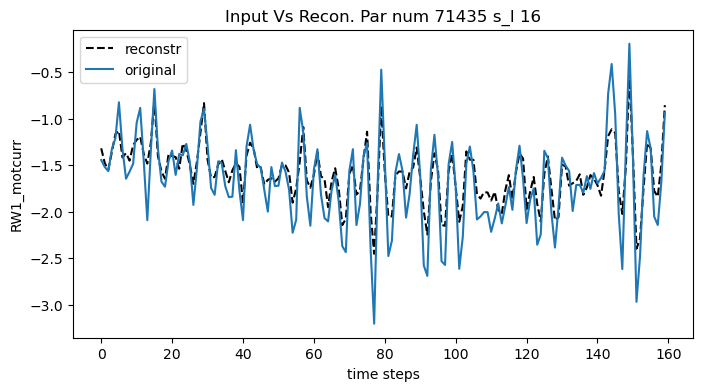

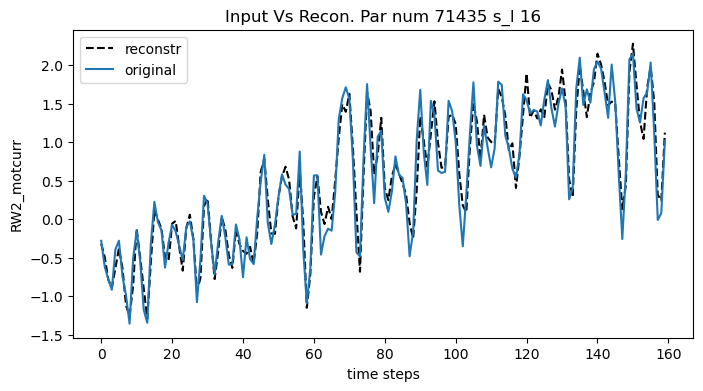

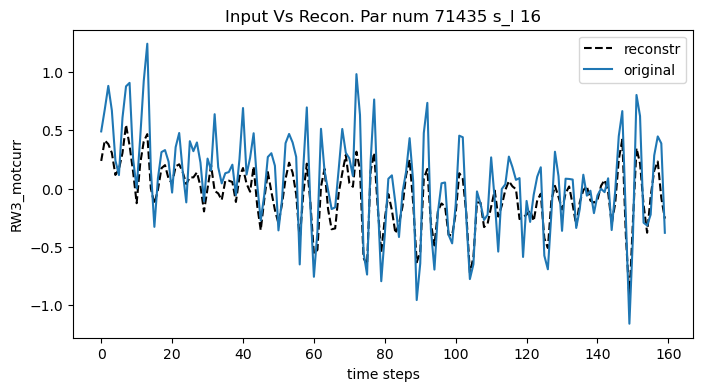

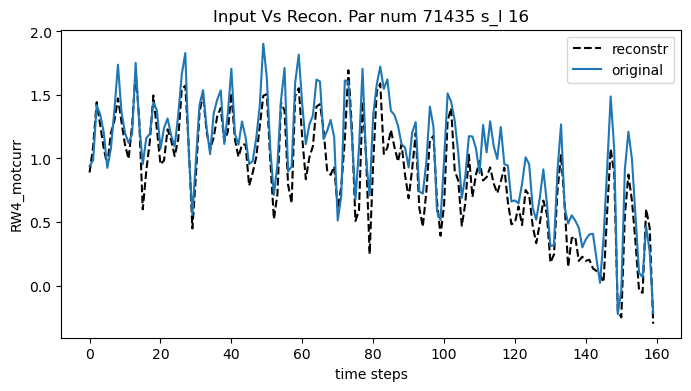

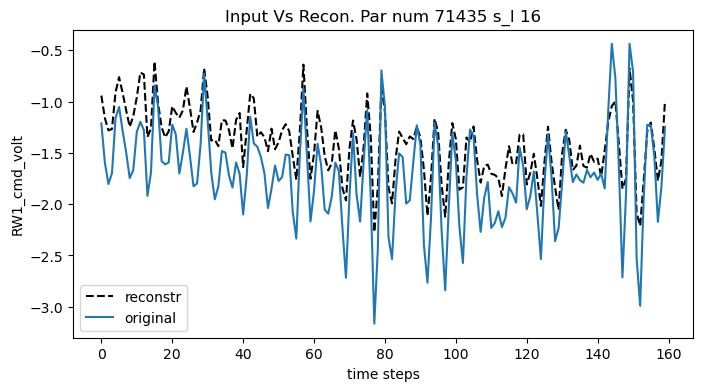

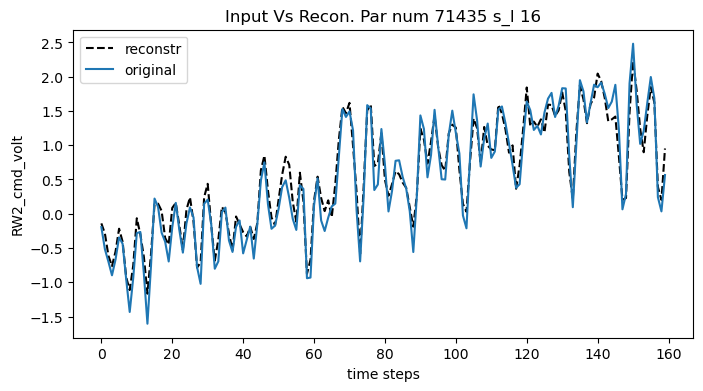

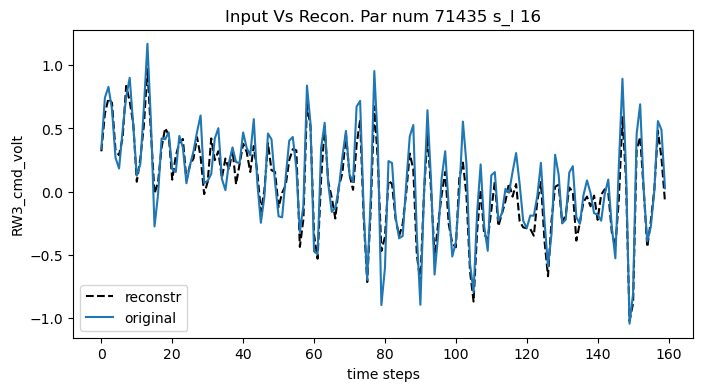

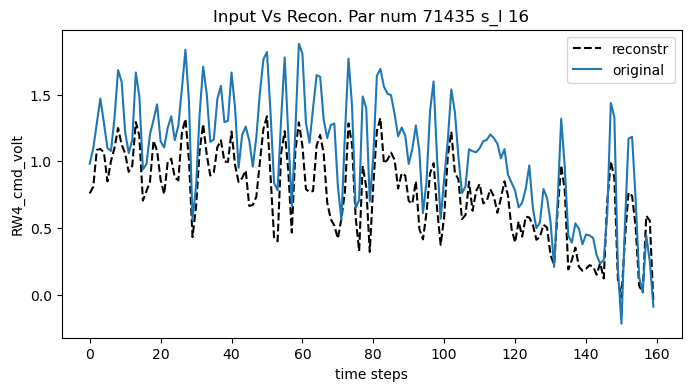

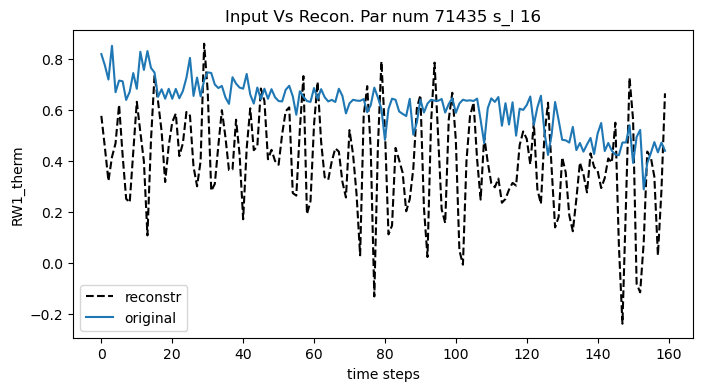

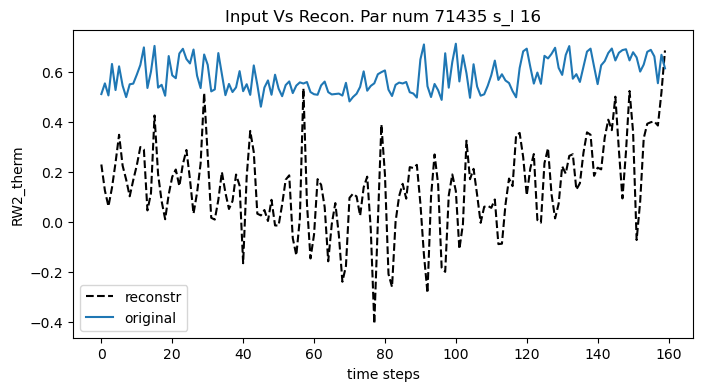

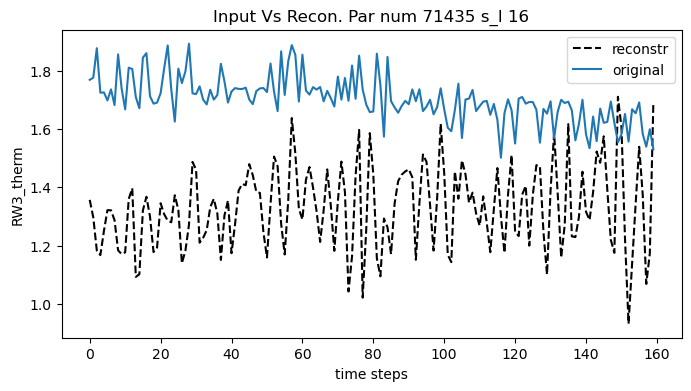

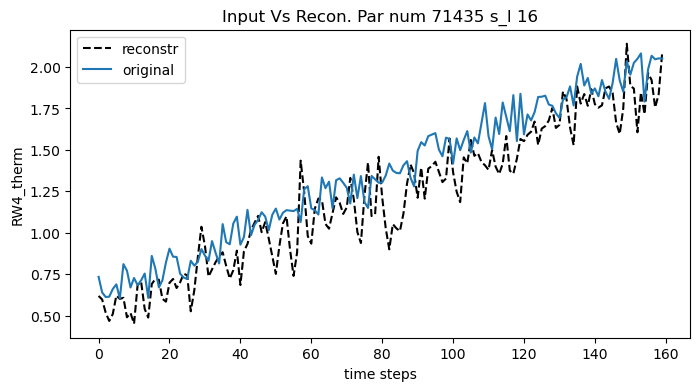

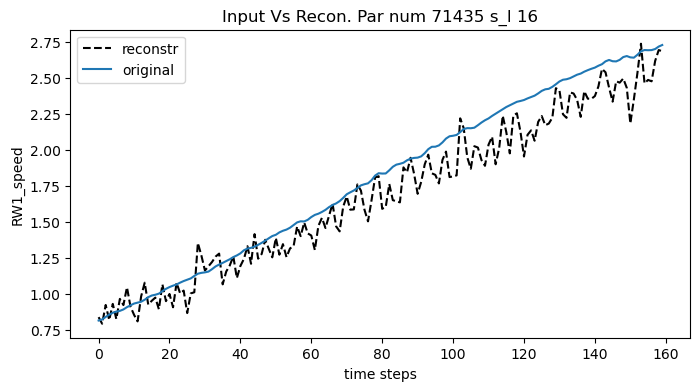

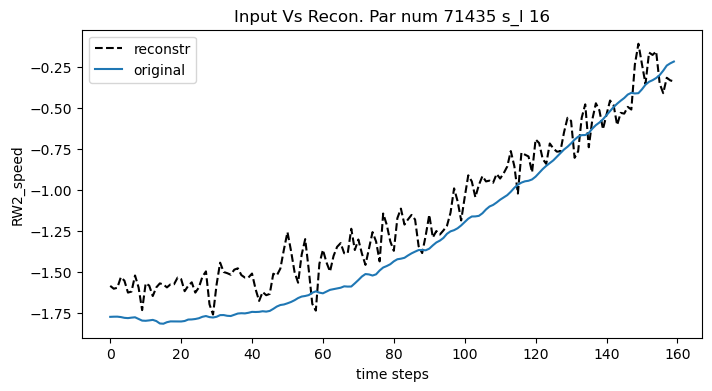

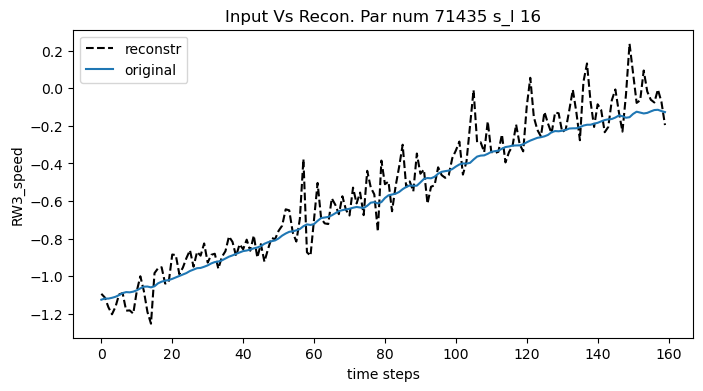

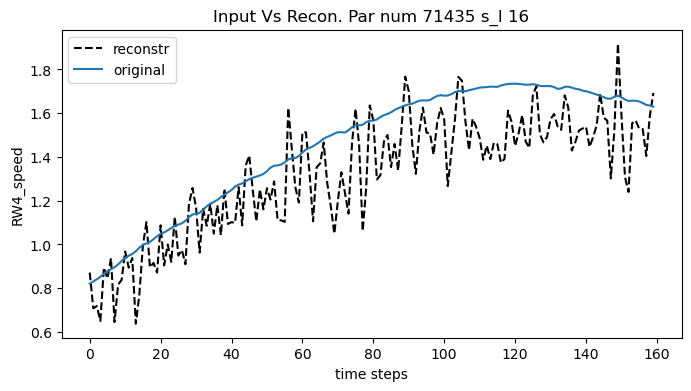

In [24]:
x_plot = x.squeeze().to(device)
show_results(x_plot , yo, cols, model_name, params_conf
     , par_nums, shift, num_batch,arch=architecture,save=False)